In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Question 1

In an edge detection algorithm, one common approach is to initially perform Gaussian smoothing on the image and subsequently apply the Laplacian filter. If we reverse this order and first apply the Laplacian filter followed by Gaussian smoothing, what distinctions emerge between the two approaches?
(Ensure that the reason behind the fact is explained, and include code-based calculation and results display for Lena image.)

## Answer 1

1. Gaussian Smoothing followed by Laplacian Filter:
   - In this approach, you start by applying a Gaussian filter to the image. The Gaussian filter smoothens the image and reduces noise, which helps in getting a smoother representation of the image.
   - After the Gaussian smoothing, you apply the Laplacian filter. The Laplacian filter enhances high-frequency components in the image, which correspond to edges and abrupt changes in intensity.
   - This approach is commonly known as the LoG (Laplacian of Gaussian) operator or the Marr-Hildreth edge detection method. It's effective at detecting edges and can also highlight edges at different scales by using different levels of Gaussian smoothing.

2. Laplacian Filter followed by Gaussian Smoothing:
   - In this approach, you apply the Laplacian filter first, enhancing edges and high-frequency components in the original image.
   - After the Laplacian filter, you apply Gaussian smoothing. This will then blur the already enhanced edges, making them less pronounced.
   - The result of this approach is typically a smoothed image with reduced edge information.


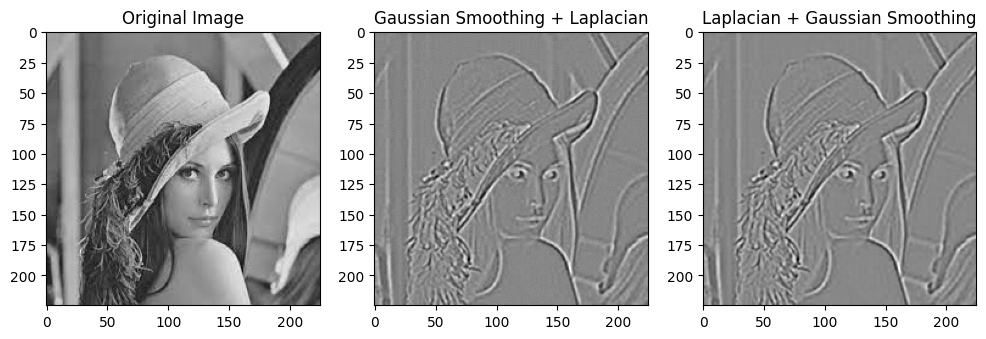

In [3]:
# Load the Lena image
lena = cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE)

# Gaussian Smoothing followed by Laplacian Filter
gaussian_laplacian = cv2.Laplacian(cv2.GaussianBlur(lena, (5, 5), 0), cv2.CV_64F)

# Laplacian Filter followed by Gaussian Smoothing
laplacian_gaussian = cv2.GaussianBlur(cv2.Laplacian(lena, cv2.CV_64F), (5, 5), 0)

# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(131), plt.imshow(lena, cmap='gray'), plt.title('Original Image')
plt.subplot(132), plt.imshow(gaussian_laplacian, cmap='gray'), plt.title('Gaussian Smoothing + Laplacian')
plt.subplot(133), plt.imshow(laplacian_gaussian, cmap='gray'), plt.title('Laplacian + Gaussian Smoothing')

plt.show()

# Question 2
What are the key distinctions between applying the first derivative test vertically and horizontally, and in what situations would you choose one over the other for specific use cases?

## Answer 2

The key distinctions between applying the first derivative test (often using gradient operators like Sobel or Prewitt) vertically and horizontally lie in the directions of the edges detected and the specific use cases for which you might choose one over the other:

1. Vertical First Derivative (Edge Detection in the Vertical Direction):
   - Vertical edge detection emphasizes changes in intensity values in the vertical direction (up and down) within an image.
   - It highlights vertical edges, such as those in objects standing upright or in images where the primary features of interest are oriented vertically. For example, it is useful for detecting edges in buildings, trees, or text in a document.

2. Horizontal First Derivative (Edge Detection in the Horizontal Direction):
   - Horizontal edge detection emphasizes changes in intensity values in the horizontal direction (left and right) within an image.
   - It highlights horizontal edges, such as those in objects lying flat or in images where the primary features of interest are oriented horizontally. For example, it is useful for detecting edges in roads, horizons, or text lines in a document.

3. Choosing the Direction for Specific Use Cases:
   - The choice of whether to apply the first derivative test vertically or horizontally depends on the orientation and alignment of the features or edges of interest in your image.
   - If you expect the most prominent edges to be oriented vertically, use the vertical derivative to highlight these edges.
   - Conversely, if the prominent edges are horizontal, use the horizontal derivative to emphasize them.
   - In cases where both vertical and horizontal edges are important, you can apply both operators to the image and work with the resulting gradient magnitudes to identify edges in any direction.

For example, in a medical imaging context, you might apply the vertical first derivative operator to highlight blood vessels (often vertically oriented) in an X-ray image. In a scene analysis task, the horizontal first derivative operator might be more appropriate for detecting road edges in a landscape image.

In some cases, you might use both horizontal and vertical edge detection to extract features comprehensively. You can also consider using more advanced edge detection techniques like the Canny edge detector, which combines both vertical and horizontal edge information while also performing edge tracing and non-maximum suppression to produce more robust results.

# Question 3

Original Image: [ 80 110  45 150  25  70 200  95 120  30  65 175  55  40 180]
Equalized Image: [136 170  68 204  17 119 255 153 187  34 102 221  85  51 238]


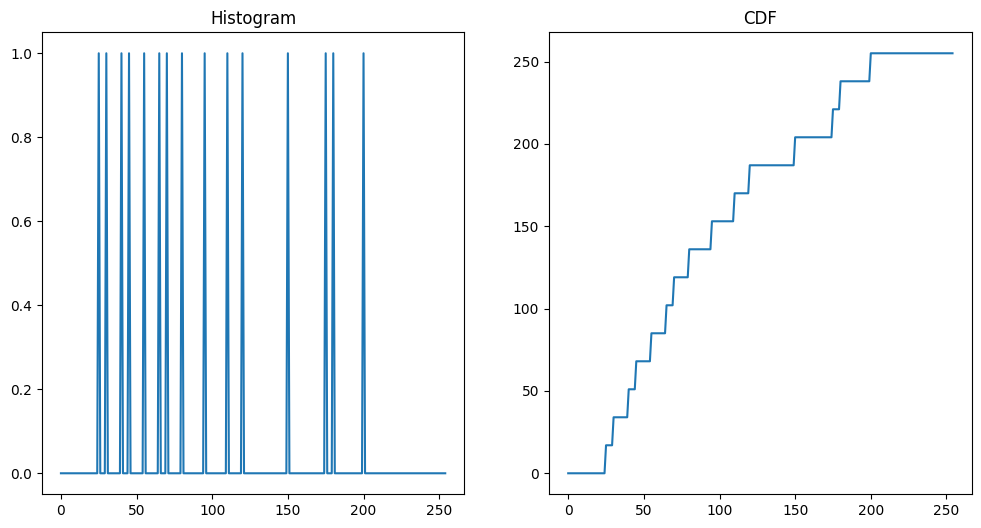

In [4]:
import numpy as np

# Define the input image
image = np.array([80, 110, 45, 150, 25, 70, 200, 95, 120, 30, 65, 175, 55, 40, 180])

# Calculate the histogram
histogram = np.histogram(image, bins=np.arange(0, 256))[0]

# Compute the cumulative distribution function (CDF)
cdf = np.cumsum(histogram)

# Normalize the CDF to map to new equalized values
cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
cdf_normalized = cdf_normalized.astype('uint8')

# Apply the equalization to the image
equalized_image = cdf_normalized[image]

# Display the original and equalized images
print("Original Image:", image)
print("Equalized Image:", equalized_image)

# Plot the histogram and CDF

plt.figure(figsize=(12, 6))
plt.subplot(121), plt.plot(histogram), plt.title('Histogram')
plt.subplot(122), plt.plot(cdf_normalized), plt.title('CDF')
plt.show()

# Question 4

Explore the utilization of wavelets in image compression and elaborate on the fundamental procedures within wavelet-based image compression, including processes like wavelet decomposition and quantization.

## Answer 4

Wavelet-based image compression is a form of lossy compression that uses wavelet transforms to decompose an image into different frequency components. The wavelet transform is a mathematical function that divides a signal into different frequency components, each representing a different scale. The wavelet transform is similar to the Fourier transform, but it is more localized in time and space. This means that it can be used to analyze signals with sharp changes in frequency or amplitude.

Wavelets are a mathematical tool used in signal processing , data analysis , and image compression. They are also used in many other fields, such as physics , engineering , and economics.
Wavelets are widely used in the computer graphics community to perform multi resolution geometric processing, they have also been used in computer vision for similar applications,
as well as for multi scale oriented filtering and denoising.

Wavelets are filters that localize a signal in both space and frequency and are defined over a hierarchy of scales.

#### Wavelet Decomposition

Wavelet decomposition is a process that breaks down a signal into its component parts. It is used to analyze signals and extract information about their frequency content. The wavelet transform is a mathematical tool that can be used to decompose a signal into different frequency components. It is similar to the Fourier transform, but it is more localized in time and space. This means that it can be used to analyze signals with sharp changes in frequency or amplitude.

#### Quantization

Quantization is a process that converts a continuous signal into a discrete signal. It is used in many applications, such as digital audio and video compression, image processing, and data compression. Quantization is the process of converting a continuous signal into a discrete signal. It is used in many applications, such as digital audio and video compression, image processing, and data compression.

# Question 5

Write a program which can, firstly, down sample an image by a factor of 2, with and without using the averaging filter, and also, up-sample the previously down sampled images by a factor of 2, using the pixel replication and bilinear interpolation methods, respectively. (Lena image)

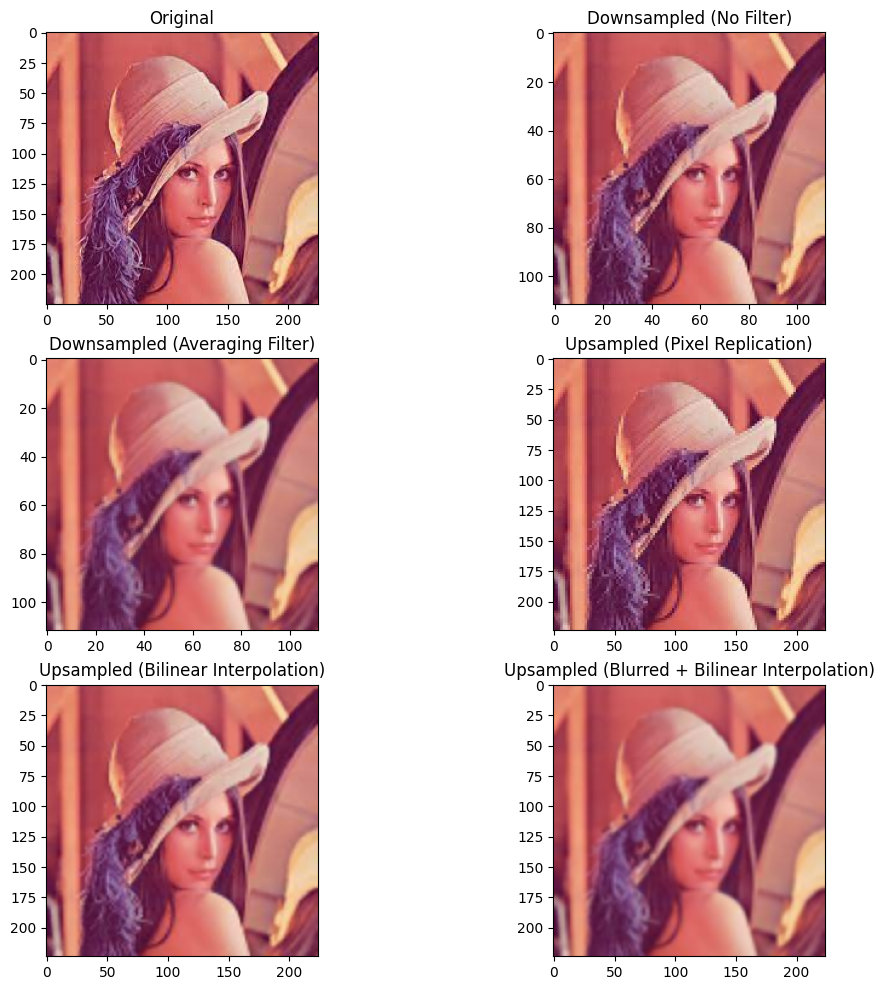

In [1]:
# Load the Lena image
lena = cv2.imread('lena.jpg')

# Downsample by a factor of 2 without averaging filter
downsampled = cv2.resize(lena, (0, 0), fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

# Downsample by a factor of 2 with averaging filter
blurred = cv2.GaussianBlur(lena, (5, 5), 0)
downsampled_blurred = cv2.resize(blurred, (0, 0), fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

# Upsample the downsampled images using pixel replication and bilinear interpolation
upsampled_nearest = cv2.resize(downsampled, (0, 0), fx=2, fy=2, interpolation=cv2.INTER_NEAREST)
upsampled_linear = cv2.resize(downsampled, (0, 0), fx=2, fy=2, interpolation=cv2.INTER_LINEAR)
upsampled_blurred_nearest = cv2.resize(downsampled_blurred, (0, 0), fx=2, fy=2, interpolation=cv2.INTER_NEAREST)
upsampled_blurred_linear = cv2.resize(downsampled_blurred, (0, 0), fx=2, fy=2, interpolation=cv2.INTER_LINEAR)

# Display the results
plt.figure(figsize=(12, 12))
plt.subplot(321), plt.imshow(lena[:,:,::-1]), plt.title('Original')
plt.subplot(322), plt.imshow(downsampled[:,:,::-1]), plt.title('Downsampled (No Filter)')
plt.subplot(323), plt.imshow(downsampled_blurred[:,:,::-1]), plt.title('Downsampled (Averaging Filter)')
plt.subplot(324), plt.imshow(upsampled_nearest[:,:,::-1]), plt.title('Upsampled (Pixel Replication)')
plt.subplot(325), plt.imshow(upsampled_linear[:,:,::-1]), plt.title('Upsampled (Bilinear Interpolation)')
plt.subplot(326), plt.imshow(upsampled_blurred_linear[:,:,::-1]), plt.title('Upsampled (Blurred + Bilinear Interpolation)')
plt.show()
